In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
import tensorflow as tf
from tensorflow import keras
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Flatten,Input
from keras.models import Model
from glob import glob

In [3]:
train_path="dataset/train"
val_path="dataset/val"

In [4]:
folders=glob("dataset/train/*")

In [5]:
folders

['dataset/train\\NORMAL', 'dataset/train\\PNEUMONIA']

In [6]:
img_size=[224,224]

In [7]:
vgg=VGG16(input_shape=img_size + [3], weights='imagenet', include_top=False)

In [8]:
for layer in vgg.layers:
    layer.trainable = False

In [9]:
x = Flatten()(vgg.output)

In [10]:
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)


In [11]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [12]:
model.compile(optimizer="adam",loss='categorical_crossentropy',metrics=['accuracy'])

In [13]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [14]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [15]:
training_set = train_datagen.flow_from_directory('dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 10,
                                                 class_mode = 'categorical')




test_set = test_datagen.flow_from_directory('dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 10,
                                            class_mode = 'categorical')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [17]:
history = model.fit_generator(training_set,validation_data=test_set,epochs=3,steps_per_epoch=len(training_set),validation_steps=len(test_set))

C:\Users\PMYLS\AppData\Local\Temp\ipykernel_8404\489756863.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(training_set,validation_data=test_set,epochs=3,steps_per_epoch=len(training_set),validation_steps=len(test_set))


Epoch 1/3
522/522 [==============================] - 1023s 2s/step - loss: 0.1671 - accuracy: 0.9446 - val_loss: 0.5594 - val_accuracy: 0.8750
Epoch 2/3
522/522 [==============================] - 1036s 2s/step - loss: 0.2124 - accuracy: 0.9427 - val_loss: 0.3298 - val_accuracy: 0.9263
Epoch 3/3
522/522 [==============================] - 980s 2s/step - loss: 0.1169 - accuracy: 0.9653 - val_loss: 0.3450 - val_accuracy: 0.9119


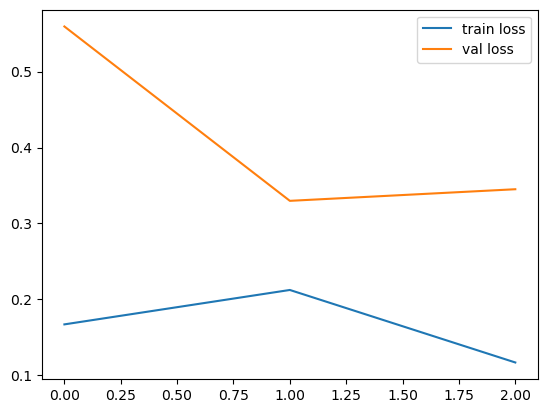

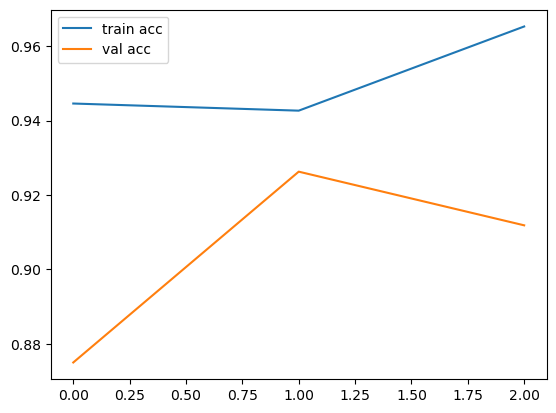

<Figure size 640x480 with 0 Axes>

In [18]:
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [22]:
img=image.load_img('normal_1.jpeg',target_size=(224,224))

In [24]:
x=image.img_to_array(img)

In [26]:
x

array([[[10., 10., 10.],
        [ 5.,  5.,  5.],
        [ 8.,  8.,  8.],
        ...,
        [15., 15., 15.],
        [11., 11., 11.],
        [12., 12., 12.]],

       [[ 9.,  9.,  9.],
        [ 7.,  7.,  7.],
        [ 9.,  9.,  9.],
        ...,
        [14., 14., 14.],
        [ 9.,  9.,  9.],
        [11., 11., 11.]],

       [[11., 11., 11.],
        [ 7.,  7.,  7.],
        [ 9.,  9.,  9.],
        ...,
        [14., 14., 14.],
        [13., 13., 13.],
        [11., 11., 11.]],

       ...,

       [[45., 45., 45.],
        [32., 32., 32.],
        [20., 20., 20.],
        ...,
        [12., 12., 12.],
        [13., 13., 13.],
        [12., 12., 12.]],

       [[52., 52., 52.],
        [32., 32., 32.],
        [22., 22., 22.],
        ...,
        [14., 14., 14.],
        [14., 14., 14.],
        [13., 13., 13.]],

       [[51., 51., 51.],
        [34., 34., 34.],
        [23., 23., 23.],
        ...,
        [15., 15., 15.],
        [12., 12., 12.],
        [12., 12., 12.]]

In [27]:
x=np.expand_dims(x, axis=0)

In [29]:
x.shape

(1, 224, 224, 3)

In [32]:
x

array([[[[-113.68    , -106.779   ,  -93.939   ],
         [-118.68    , -111.779   ,  -98.939   ],
         [-115.68    , -108.779   ,  -95.939   ],
         ...,
         [-108.68    , -101.779   ,  -88.939   ],
         [-112.68    , -105.779   ,  -92.939   ],
         [-111.68    , -104.779   ,  -91.939   ]],

        [[-114.68    , -107.779   ,  -94.939   ],
         [-116.68    , -109.779   ,  -96.939   ],
         [-114.68    , -107.779   ,  -94.939   ],
         ...,
         [-109.68    , -102.779   ,  -89.939   ],
         [-114.68    , -107.779   ,  -94.939   ],
         [-112.68    , -105.779   ,  -92.939   ]],

        [[-112.68    , -105.779   ,  -92.939   ],
         [-116.68    , -109.779   ,  -96.939   ],
         [-114.68    , -107.779   ,  -94.939   ],
         ...,
         [-109.68    , -102.779   ,  -89.939   ],
         [-110.68    , -103.779   ,  -90.939   ],
         [-112.68    , -105.779   ,  -92.939   ]],

        ...,

        [[ -78.68    ,  -71.779   ,  -

In [33]:
img_data=preprocess_input(x)

In [35]:
classe=model.predict(img_data)

1/1 [==============================] - 0s 454ms/step


In [39]:
value=classe[0][0]

In [41]:
if(value==0):
    print("Pneumonia")
else:
    print("Normal")


Normal
